# Covid-19 in the Philippines

Data as of January 29, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220129 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220129 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220129 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20220129 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528791,C69846241,37.0,35 to 39,FEMALE,2022-01-27,2022-01-27,2022-01-29,NaN,NaN,NaN,NaN,Region IV-A: CALABARZON,LAGUNA,CALAUAN,PH043406000,PRINZA,PH043406015,MILD,NO,2022-01-25,NO,NaN
3528792,C58691067,39.0,35 to 39,MALE,2022-01-26,2022-01-27,2022-01-29,NaN,NaN,NaN,NaN,Region III: Central Luzon,TARLAC,CITY OF TARLAC (CAPITAL),PH036916000,MALIWALO,PH036916048,MILD,NO,NaN,NaN,NaN
3528793,C10181908,19.0,15 to 19,FEMALE,2022-01-27,2022-01-27,2022-01-29,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF PARAÑAQUE,PH137604000,B. F. HOMES,PH137604007,MILD,NO,NaN,NO,NaN
3528794,C72992736,66.0,65 to 69,MALE,2022-01-27,2022-01-27,2022-01-29,NaN,NaN,NaN,NaN,Region VII: Central Visayas,CEBU,LAPU-LAPU CITY (OPON),PH072226000,MARIBAGO,PH072226016,MILD,NO,NaN,NaN,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.capitalize()
df['ProvRes'] = df['ProvRes'].str.capitalize()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3528781
True          15
dtype: int64

There are **15 duplicated records** found in the report. These duplicated records mean they have matching entries **across all columns**.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3528796
Name: CaseCode, dtype: int64

No NaN detected as of this latest update. This means we can easily **resample** the cases.

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see that the Sex column remains all filled.

In [9]:
df.Sex.isna().value_counts()

False    3528796
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').Sex.count().to_frame().reset_index()
cases.tail()

,DateRepConf,Sex
726,2022-01-25,17619
727,2022-01-26,15764
728,2022-01-27,17795
729,2022-01-28,18631
730,2022-01-29,17382


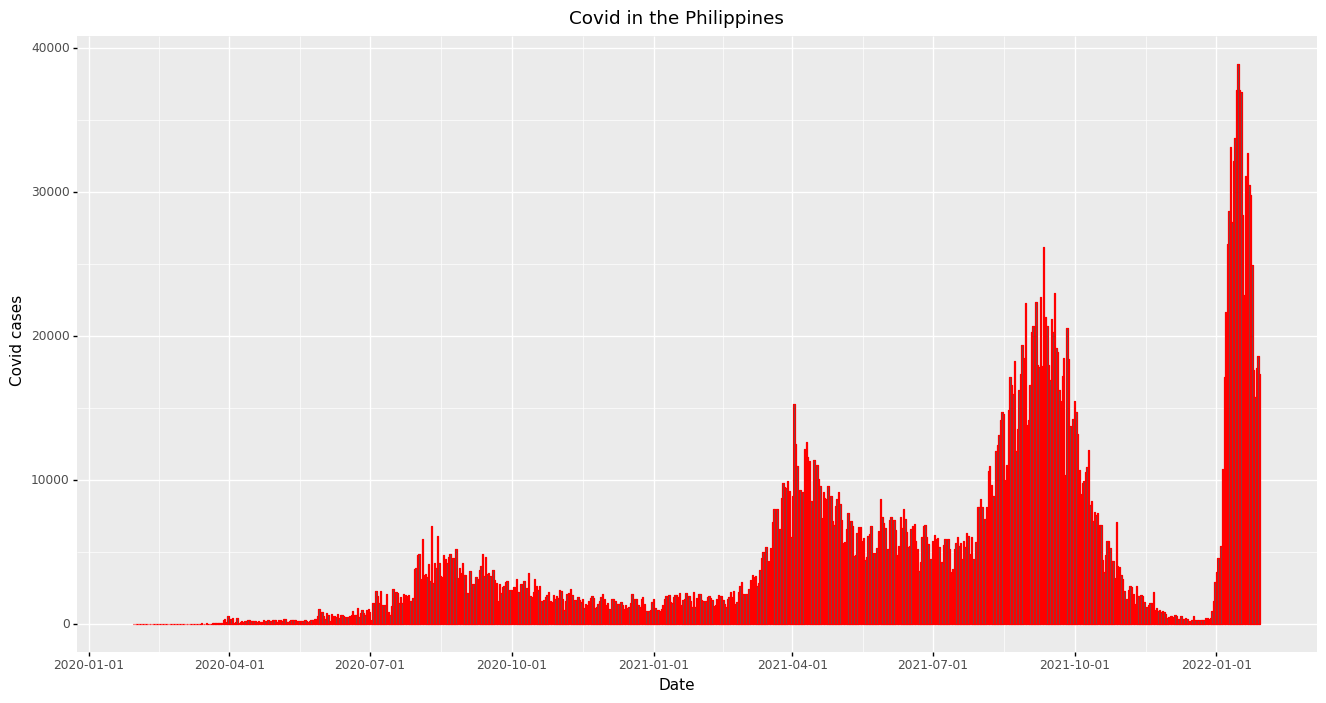

<ggplot: (362927059)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'Sex')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [12]:
df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().round().tail(20)

DateRepConf
2022-01-10    11522.0
2022-01-11    13489.0
2022-01-12    15721.0
2022-01-13    18019.0
2022-01-14    20460.0
2022-01-15    22980.0
2022-01-16    25300.0
2022-01-17    27651.0
2022-01-18    29293.0
2022-01-19    30160.0
2022-01-20    31155.0
2022-01-21    31943.0
2022-01-22    32236.0
2022-01-23    32318.0
2022-01-24    31733.0
2022-01-25    30996.0
2022-01-26    29826.0
2022-01-27    28684.0
2022-01-28    27364.0
2022-01-29    25827.0
Freq: D, Name: Sex, dtype: float64

In [13]:
case_roll = df.resample('D', on='DateRepConf').Sex.count().rolling(14).mean().to_frame().reset_index()
case_roll.tail(10)

,DateRepConf,Sex
721,2022-01-20,31154.714286
722,2022-01-21,31943.000000
723,2022-01-22,32236.428571
724,2022-01-23,32317.857143
725,2022-01-24,31733.428571
726,2022-01-25,30995.500000
727,2022-01-26,29826.214286
728,2022-01-27,28684.000000
729,2022-01-28,27364.071429
730,2022-01-29,25826.785714


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


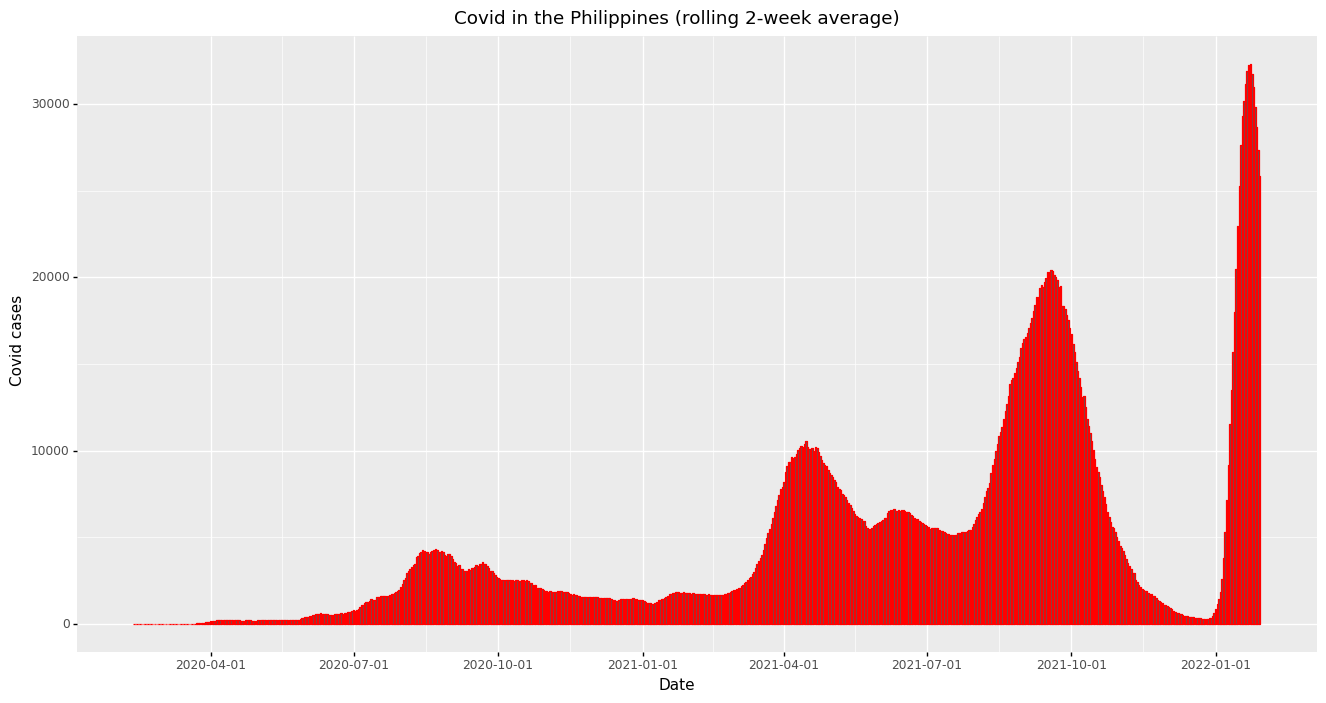

<ggplot: (362927077)>

In [14]:
(
    ggplot(case_roll, aes('DateRepConf', 'Sex')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [15]:
df.resample('D', on='DateOnset').Sex.count().tail(10)

DateOnset
2022-01-19    6341
2022-01-20    5561
2022-01-21    4713
2022-01-22    3899
2022-01-23    2952
2022-01-24    3311
2022-01-25    2504
2022-01-26    1458
2022-01-27     532
2022-01-28      37
Name: Sex, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [16]:
df.resample('D', on='DateSpecimen').Sex.count().tail(10)

DateSpecimen
2022-01-19    26747
2022-01-20    23642
2022-01-21    22374
2022-01-22    14420
2022-01-23     8989
2022-01-24    21602
2022-01-25    16660
2022-01-26    13815
2022-01-27     6619
2022-01-28      174
Name: Sex, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [17]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-01-20    22677
2022-01-21    11987
2022-01-22     4849
2022-01-23     1557
2022-01-24      827
2022-01-25      417
2022-01-26      585
2022-01-27      338
2022-01-28      149
2022-01-29     3938
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [18]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-01-18    59
2022-01-19    38
2022-01-20    48
2022-01-21    39
2022-01-22    62
2022-01-23    47
2022-01-24    42
2022-01-25    48
2022-01-26    32
2022-01-27    14
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [19]:
df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,700 (0.11%) have no indicated regional location.

NCR                               1142320
Region IV-A: CALABARZON            637838
Region III: Central Luzon          349355
Region VII: Central Visayas        180834
Region VI: Western Visayas         179214
Region II: Cagayan Valley          156475
Region XI: Davao Region            127774
Region I: Ilocos Region            126572
CAR                                112100
Region X: Northern Mindanao         98614
Region XII: SOCCSKSARGEN            67727
Region V: Bicol Region              63437
Region VIII: Eastern Visayas        62041
Region IX: Zamboanga Peninsula      61322
CARAGA                              58204
Region IV-B: MIMAROPA               42091
ROF                                 34968
BARMM                               24122
NaN                                  3788
Name: RegionRes, dtype: int64

Interpretation: Half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [20]:
df.ProvRes.value_counts(dropna=False).head(10)
#Over 43,000 (1.4%) have no information into provincial location.

Ncr              1136569
Cavite            211878
Laguna            159814
Rizal             138459
Bulacan           133142
Cebu              130760
Batangas           90239
Pampanga           85443
Davao del sur      82592
Iloilo             71324
Name: ProvRes, dtype: int64

# Which municipalities?

In [21]:
df.CityMunRes.value_counts(dropna=False).head(15)
#Over 58,000 (nearly 2%) people infected have no information on their municipal location.

Quezon city            238520
City of manila         142168
City of pasig           82898
Taguig city             81889
Caloocan city           81574
City of makati          80378
Davao city              69279
City of parañaque       68650
NaN                     54765
Cebu city (capital)     52390
Pasay city              50409
City of las piñas       49274
City of valenzuela      48578
City of mandaluyong     47002
City of muntinlupa      41173
Name: CityMunRes, dtype: int64

Interpretation: Seven cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [22]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan del norte,Agusan del sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines norte,Camarines sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City of isabela (not a province),Cotabato (north cotabato),Cotabato city (not a province),Davao de oro,Davao del norte,Davao del sur,Davao occidental,Davao oriental,Dinagat islands,Eastern samar,Guimaras,Ifugao,Ilocos norte,Ilocos sur,Iloilo,Isabela,Kalinga,La union,Laguna,Lanao del norte,Lanao del sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis occidental,Misamis oriental,Mountain province,Ncr,Negros occidental,Negros oriental,Northern samar,Nueva ecija,Nueva vizcaya,Occidental mindoro,Oriental mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (western samar),Sarangani,Siquijor,Sorsogon,South cotabato,Southern leyte,Sultan kudarat,Sulu,Surigao del norte,Surigao del sur,Tarlac,Tawi-tawi,Zambales,Zamboanga del norte,Zamboanga del sur,Zamboanga sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [23]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')

In [24]:
df_prov2.sex = df_prov2.sex.astype(int)
df_prov2

,DateRepConf,province,sex
0,2020-01-30,Abra,0
461,2021-06-07,Abra,5
462,2021-06-08,Abra,5
463,2021-06-09,Abra,0
464,2021-06-10,Abra,6
...,...,...,...
58168,2020-10-23,Zamboanga sibugay,1
58169,2020-10-24,Zamboanga sibugay,6
58170,2020-10-25,Zamboanga sibugay,1
58162,2020-10-17,Zamboanga sibugay,1


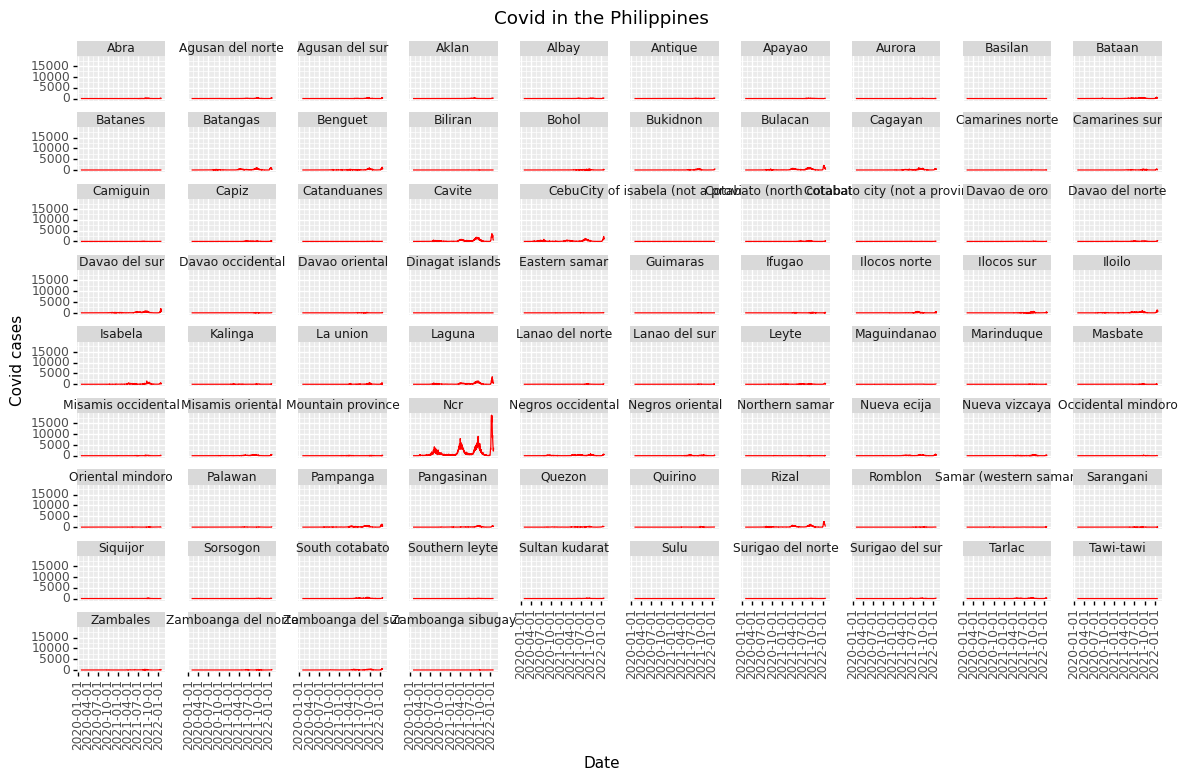

<ggplot: (362979359)>

In [25]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'sex')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [26]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='Sex', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,0,13.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [27]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='sex', var_name='province').sort_values('province')
df_reg2.sex = df_reg2.sex.astype(int)
df_reg2

,DateRepConf,province,sex
0,2020-01-30,BARMM,0
461,2021-06-07,BARMM,117
462,2021-06-08,BARMM,123
463,2021-06-09,BARMM,82
464,2021-06-10,BARMM,32
...,...,...,...
12100,2020-10-23,Region XII: SOCCSKSARGEN,51
12101,2020-10-24,Region XII: SOCCSKSARGEN,35
12102,2020-10-25,Region XII: SOCCSKSARGEN,58
12094,2020-10-17,Region XII: SOCCSKSARGEN,24


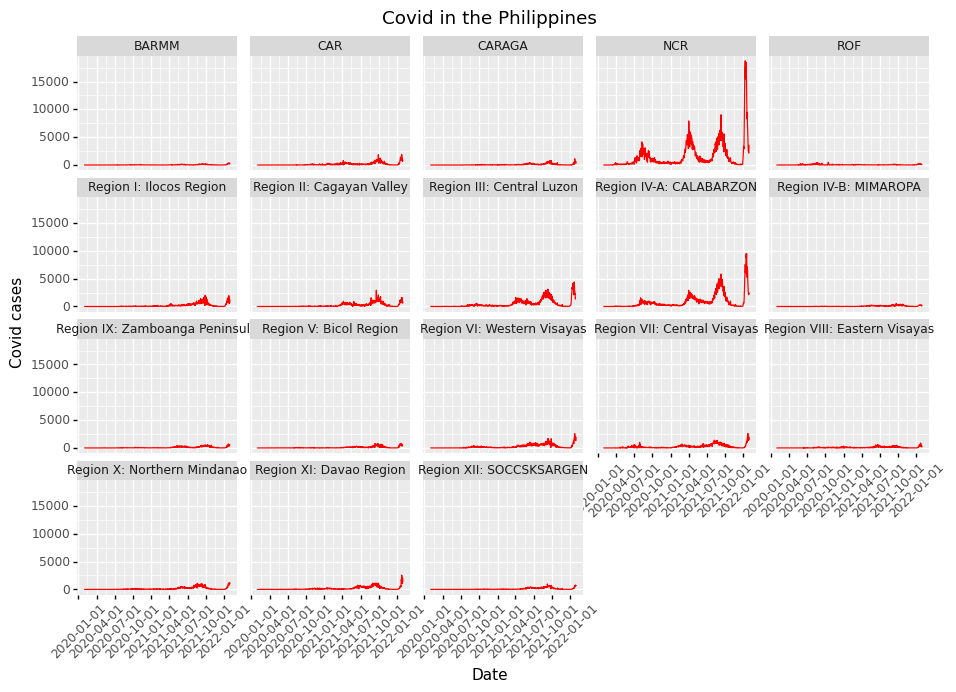

<ggplot: (364122962)>

In [28]:
plt=(
    ggplot(df_reg2, aes('DateRepConf', 'sex')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.08}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)
plt
#ggsave(plt, "covid.svg")

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [29]:
#df_munc = df.CityMunRes.value_counts().sort_index()
#df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
#df_munc

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [30]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-20    9427
2022-01-21    7259
2022-01-22    6610
2022-01-23    5403
2022-01-24    4006
2022-01-25    2726
2022-01-26    2457
2022-01-27    2146
2022-01-28    2253
2022-01-29    3625
Freq: D, Name: Sex, dtype: int64

In [31]:
#Example for municipalities
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().tail(10)

DateRepConf
2022-01-20    1627
2022-01-21    1258
2022-01-22    1213
2022-01-23    1014
2022-01-24    1023
2022-01-25     642
2022-01-26     452
2022-01-27     447
2022-01-28     420
2022-01-29     688
Freq: D, Name: Sex, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

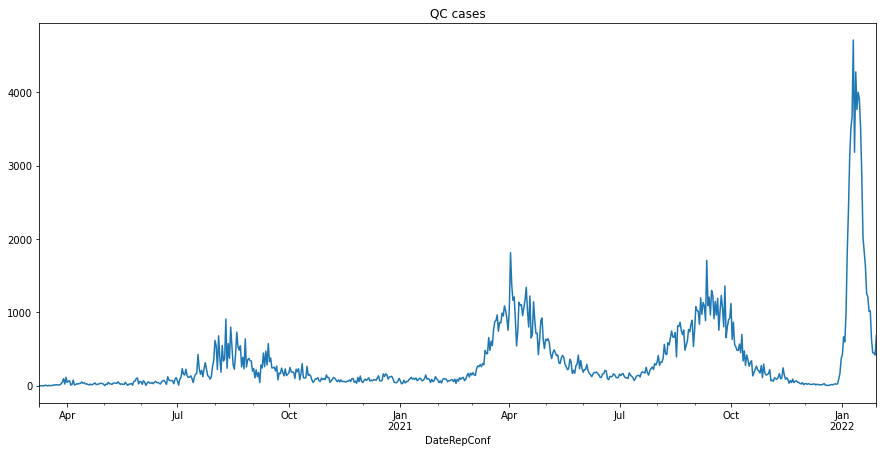

In [32]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').Sex.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [33]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.510020
30 to 34    12.865833
20 to 24    10.289147
35 to 39     9.863704
40 to 44     8.374783
45 to 49     6.869482
50 to 54     6.322553
55 to 59     5.584823
60 to 64     4.415415
15 to 19     4.313964
65 to 69     3.298972
10 to 14     2.981612
70 to 74     2.400592
0 to 4       2.316116
5 to 9       2.314245
80+          1.753374
75 to 79     1.441370
NaN          0.083995
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [34]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.82898
MALE      49.17102
Name: Sex, dtype: float64

In [35]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    2421119
NO      995245
YES     112432
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [36]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220129 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130360,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-24,48.0,24.0,24.0,21.0,3.0,0.0,0.0,4949.0,0.0,36637,36262,10464,25798,0.29,0.71,NaN
130361,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-25,48.0,96.0,96.0,80.0,16.0,0.0,0.0,4833.0,0.0,36733,36358,10544,25814,0.29,0.71,NaN
130362,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-26,48.0,166.0,166.0,136.0,30.0,0.0,0.0,4637.0,0.0,36899,36524,10680,25844,0.29,0.71,NaN
130363,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-27,48.0,123.0,123.0,101.0,22.0,0.0,0.0,4494.0,0.0,37022,36647,10781,25866,0.29,0.71,NaN


# Transform dates to datetime format

In [37]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Look for null values

Again, nulls are not counted when resampling.

In [38]:
df_test.daily_output_unique_individuals.isna().value_counts()
#By individuals tested, nealry 9,900 had no values.

False    119994
True      10371
Name: daily_output_unique_individuals, dtype: int64

In [39]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    119992
True      10373
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [40]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
654,2022-01-17,64765.0
655,2022-01-18,77527.0
656,2022-01-19,77528.0
657,2022-01-20,70261.0
658,2022-01-21,69901.0
659,2022-01-22,62049.0
660,2022-01-23,43961.0
661,2022-01-24,48825.0
662,2022-01-25,62315.0
663,2022-01-26,63439.0


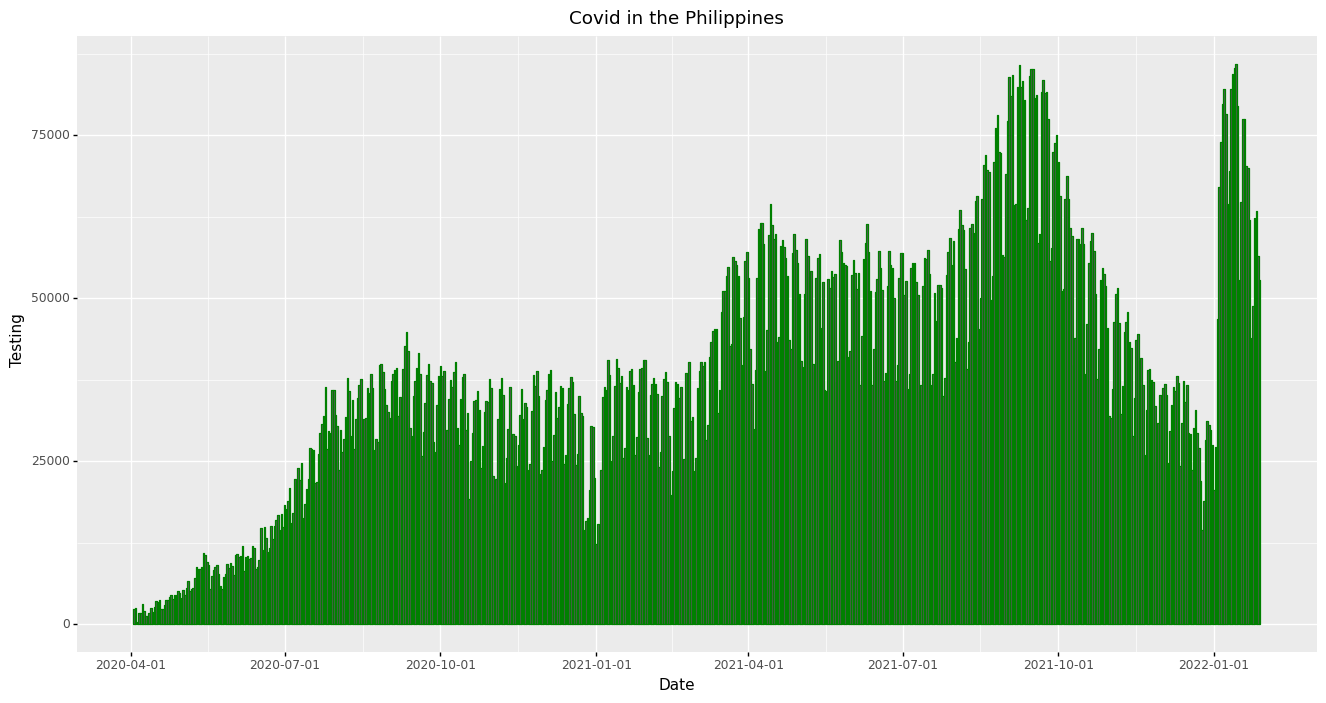

<ggplot: (366706773)>

In [41]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [42]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2022-01-14    90573.0
2022-01-15    83829.0
2022-01-16    56644.0
2022-01-17    68068.0
2022-01-18    82449.0
2022-01-19    81441.0
2022-01-20    73619.0
2022-01-21    73726.0
2022-01-22    65201.0
2022-01-23    46352.0
2022-01-24    51818.0
2022-01-25    65416.0
2022-01-26    66579.0
2022-01-27    58975.0
2022-01-28    55673.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

Shows last 10 days.

In [43]:
test_roll = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().to_frame().reset_index()
test_roll.tail(10)

,report_date,daily_output_unique_individuals
656,2022-01-19,75989.0
657,2022-01-20,75310.0
658,2022-01-21,74441.0
659,2022-01-22,73280.0
660,2022-01-23,71820.0
661,2022-01-24,70338.0
662,2022-01-25,68929.0
663,2022-01-26,67432.0
664,2022-01-27,65375.0
665,2022-01-28,63005.0


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.


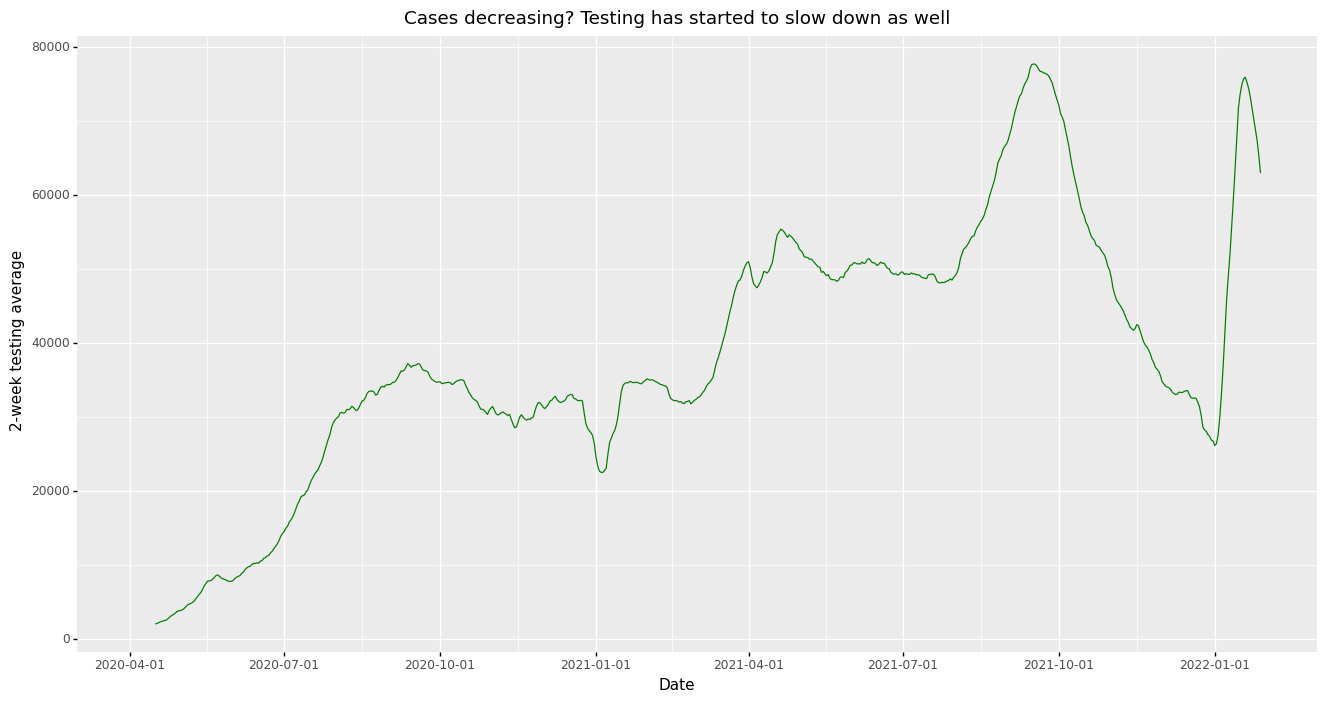

<ggplot: (366753366)>

In [44]:
(
    ggplot(test_roll, aes('report_date', 'daily_output_unique_individuals')) +
           geom_line(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="2-week testing average", title="Cases decreasing? Testing has started to slow down as well")
)

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [45]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2021-08-31    1876508.0
2022-01-31    1829308.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378529.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1014680.0
2021-12-31     943242.0
2020-12-31     929690.0
2021-02-28     906997.0
2020-11-30     894039.0
2020-07-31     768793.0
2020-06-30     360407.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

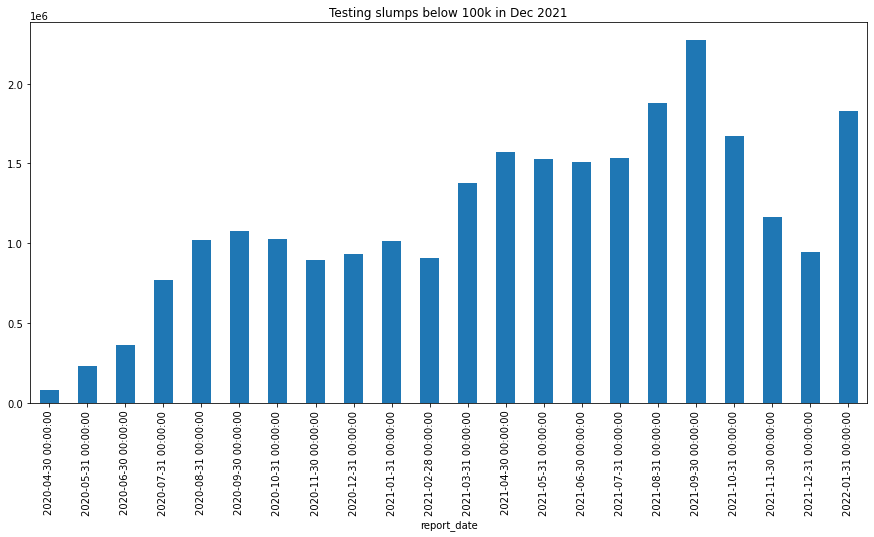

In [46]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [47]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               179664.0
Philippine Red Cross - Port Area                                          176102.0
Philippine Red Cross (PRC)                                                100596.0
Baguio General Hospital and Medical Center                                 83193.0
Research Institute for Tropical Medicine (RITM)                            77864.0
Philippine Red Cross Logistics & Multipurpose Center                       72647.0
Jose B. Lingad Memorial General Hospital                                   72140.0
Chinese General Hospital                                                   68351.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     63986.0
Cagayan Valley Medical Center Molecular Laboratory                         60728.0
Southern Philippines Medical Center (SPMC)                                 59751.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [48]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                           report_date
Detoxicare Molecular Diagnostics Laboratory             2022-01-31     33701.0
Philippine Red Cross - Port Area                        2021-09-30     27547.0
                                                        2022-01-31     25911.0
                                                        2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory             2021-09-30     21316.0
Philippine Red Cross - Port Area                        2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory             2021-04-30     18665.0
Philippine Red Cross (PRC)                              2021-09-30     18480.0
The Lord's Grace Medical and Industrial Clinic          2022-01-31     18091.0
Ilocos Training and Regional Medical Center             2021-09-30     17270.0
Baguio General Hospital and Medical Center              2021-09-30     15865.0
Philippine Red Cross - Port Area                        2021-03

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [49]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    25911.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [50]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2022-01-14    41099.0
2022-01-15    36669.0
2022-01-16    23043.0
2022-01-17    28051.0
2022-01-18    33642.0
2022-01-19    34367.0
2022-01-20    31563.0
2022-01-21    29356.0
2022-01-22    25181.0
2022-01-23    16371.0
2022-01-24    17537.0
2022-01-25    21986.0
2022-01-26    21755.0
2022-01-27    18792.0
2022-01-28    16926.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [51]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    38036
24.0    32536
72.0     7947
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [52]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
656,2022-01-19,44.328501
657,2022-01-20,44.922503
658,2022-01-21,41.996538
659,2022-01-22,40.582443
660,2022-01-23,37.239826
661,2022-01-24,35.918075
662,2022-01-25,35.282035
663,2022-01-26,34.292785
664,2022-01-27,33.291406
665,2022-01-28,32.082946


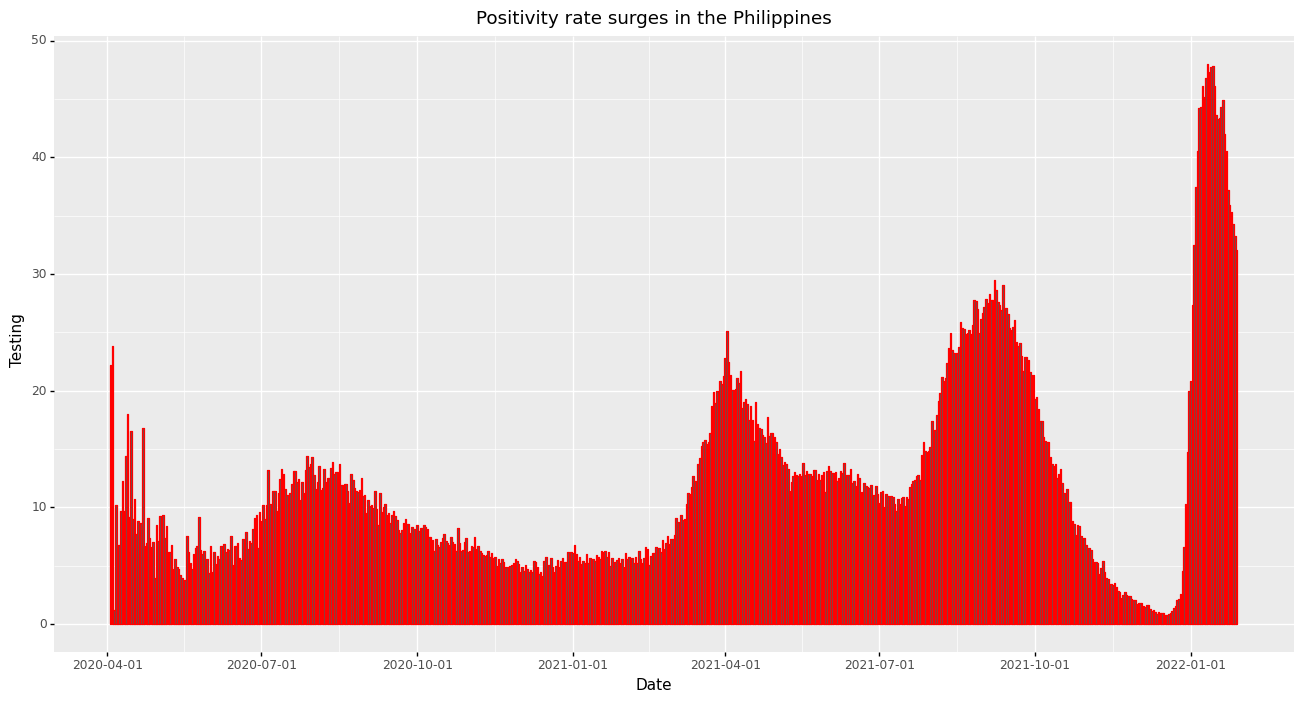

<ggplot: (366811695)>

In [57]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate surges in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [54]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [55]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [56]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")